# Hugging Face Models 🤗

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/amasetti/AI-Portfolio-Examples/blob/master/5.%20Hugging%20Face/main.ipynb)


# Document info extraction - Impira Model

![](https://templates.invoicehome.com/invoice-template-us-neat-750px.png)

In [2]:
from transformers import pipeline

nlp = pipeline("document-question-answering", model='impira/layoutlm-document-qa')

question = "What is the invoice number?"
res = nlp("https://templates.invoicehome.com/invoice-template-us-neat-750px.png", question)

print(question)
print(f'Response: {res[0]["answer"]}')


What is the invoice number?
Response: us-001


# Sentiment Analysis

In [1]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig


MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
import numpy as np
from scipy.special import softmax

def sentiment_check(text):

    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    return list(scores)

scores = sentiment_check("The movie was absolutely fantastic, and I thoroughly enjoyed every minute of it.")

print('Sentence Score:')
print(f'\t- Negative: {round(scores[0]*100, 2)}%')
print(f'\t- Neutral: {round(scores[1]*100, 2)}%')
print(f'\t- Positive: {round(scores[2]*100, 2)}%')


Sentence Score:
	- Negative: 0.44%
	- Neutral: 0.76%
	- Positive: 98.8%


# Object Detection
![](https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/coco_sample.png)

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
/Users/amasetti/.pyenv/versions/3.10.0/envs/Atlas/lib/python3.10/site-packages/transformers/models/detr/feature_extraction_detr.py:28: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(
/Users/amasetti/.pyenv/versions/3.10.0/envs/Atlas/lib/python3.10/site-packages/transformers/models/detr/image_processing_detr.py:776: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


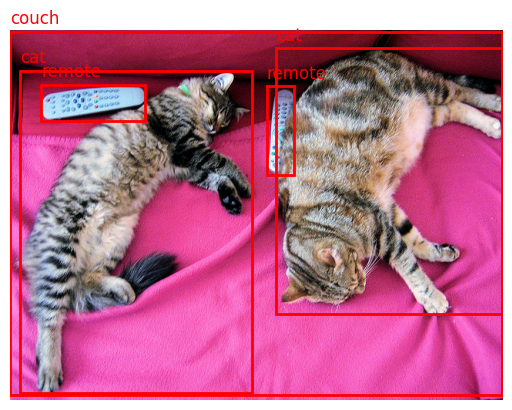

[{'box': {'xmax': 175, 'xmin': 40, 'ymax': 117, 'ymin': 70},
  'label': 'remote',
  'score': 0.9982201457023621},
 {'box': {'xmax': 368, 'xmin': 333, 'ymax': 187, 'ymin': 72},
  'label': 'remote',
  'score': 0.9960021376609802},
 {'box': {'xmax': 639, 'xmin': 0, 'ymax': 473, 'ymin': 1},
  'label': 'couch',
  'score': 0.9954745173454285},
 {'box': {'xmax': 314, 'xmin': 13, 'ymax': 470, 'ymin': 52},
  'label': 'cat',
  'score': 0.9988006353378296},
 {'box': {'xmax': 640, 'xmin': 345, 'ymax': 368, 'ymin': 23},
  'label': 'cat',
  'score': 0.9986783862113953}]


In [7]:
import requests
from PIL import Image
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from transformers import pipeline

# Download an image with cute cats
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/coco_sample.png"
image_data = requests.get(url, stream=True).raw
image = Image.open(image_data)

# Allocate a pipeline for object detection
object_detector = pipeline('object-detection')
bounding_boxes = object_detector(image)

# Plot the original image
plt.imshow(image)
plt.axis('off')

# Plot bounding boxes
ax = plt.gca()
for bbox in bounding_boxes:
    xmin = bbox['box']['xmin']
    ymin = bbox['box']['ymin']
    width = bbox['box']['xmax'] - xmin
    height = bbox['box']['ymax'] - ymin
    label = bbox['label']
    rect = Rectangle((xmin, ymin), width, height, fill=False, edgecolor='r', linewidth=2)
    ax.add_patch(rect)
    ax.text(xmin, ymin-10, label, fontsize=12, color='r')

plt.show()

pprint(bounding_boxes)
